In [117]:
# Jesus is my Saviour!

import pandas as pd 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder 
from sklearn.tree import DecisionTreeClassifier as tree


In [118]:
df=pd.read_csv('C:\\Users\\chris\\Downloads\\My_Projects\\Hotel_dataset\\Hotel Reservations.csv')

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [120]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [121]:
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [123]:
df.booking_status.value_counts()

Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64

Text(0.5, 1.0, 'CountPlot of booking_status')

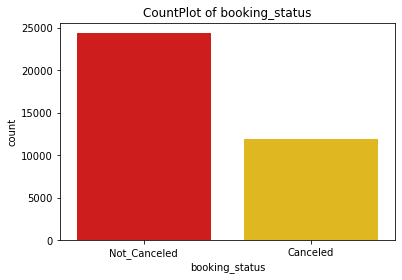

In [124]:
# Count Plot
sns.countplot(x = 'booking_status', data = df , palette = 'hot')
plt.title('CountPlot of booking_status')


In [125]:
df['booking_status']=df['booking_status'].astype('category').cat.codes

In [126]:
df.booking_status.value_counts()# 0 cancelled, 1 not cancelled

1    24390
0    11885
Name: booking_status, dtype: int64

In [127]:
df = df.drop(['Booking_ID'], axis = 1)

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_

In [129]:
df.no_of_adults.value_counts()

2    26108
1     7695
3     2317
0      139
4       16
Name: no_of_adults, dtype: int64

Text(0.5, 1.0, 'Barplot of no_of_adults')

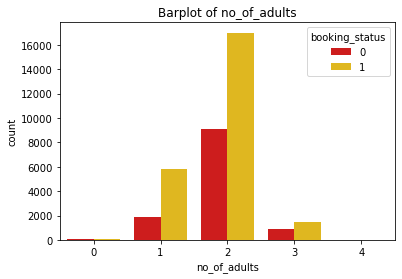

In [130]:
# Bar Plot
sns.countplot(x = 'no_of_adults', hue='booking_status', data = df , palette = 'hot')
plt.title('Barplot of no_of_adults')

In [131]:
#Hypothesis Testing
from scipy.stats import chi2_contingency
ct_house = pd.crosstab(df.no_of_adults, df.booking_status)
chi2_contingency(ct_house, correction = False)
# p_val = 3.8e-7, Ho reject, hence association exists, good predictor 

(339.16395984885366,
 3.831907699242197e-72,
 4,
 array([[4.55414197e+01, 9.34585803e+01],
        [2.52115989e+03, 5.17384011e+03],
        [8.55392364e+03, 1.75540764e+04],
        [7.59132874e+02, 1.55786713e+03],
        [5.24217781e+00, 1.07578222e+01]]))

In [132]:
round(3.831907699242197e-72,4)

0.0

In [133]:
df.no_of_children.value_counts()

0     33577
1      1618
2      1058
3        19
9         2
10        1
Name: no_of_children, dtype: int64

Text(0.5, 1.0, 'Barplot of no_of_children')

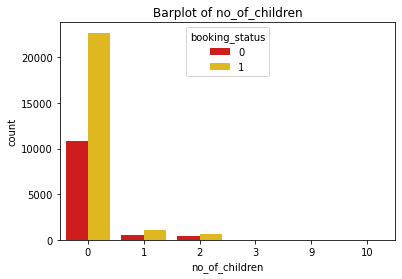

In [134]:
# Bar Plot
sns.countplot(x = 'no_of_children',hue='booking_status', data = df , palette = 'hot')
plt.title('Barplot of no_of_children')

In [135]:
#Hypothesis Testing
from scipy.stats import chi2_contingency
ct_house = pd.crosstab(df.booking_status, df.no_of_children)
chi2_contingency(ct_house, correction = False)
# p_val = 9.99-e, Ho reject, hence association exists, good predictor

(55.563035490733476,
 9.996981480354703e-11,
 5,
 array([[1.10010378e+04, 5.30115231e+02, 3.46639008e+02, 6.22508615e+00,
         6.55272226e-01, 3.27636113e-01],
        [2.25759622e+04, 1.08788477e+03, 7.11360992e+02, 1.27749139e+01,
         1.34472777e+00, 6.72363887e-01]]))

In [136]:
round(9.996981480354703e-11,4)

0.0

In [137]:
df.no_of_weekend_nights.value_counts()

0    16872
1     9995
2     9071
3      153
4      129
5       34
6       20
7        1
Name: no_of_weekend_nights, dtype: int64

Text(0.5, 1.0, 'Barplot of no_of_weekend_nights')

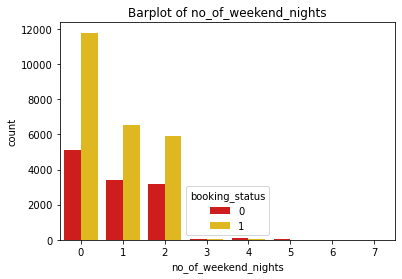

In [138]:
sns.countplot(x='no_of_weekend_nights',hue='booking_status', data=df,palette='hot')
plt.title('Barplot of no_of_weekend_nights')

In [139]:
#Hypothesis Testing
from scipy.stats import chi2_contingency
ct_house = pd.crosstab(df.booking_status, df.no_of_weekend_nights)
chi2_contingency(ct_house, correction = False)
# p_val = 9.99-e, Ho reject, hence association exists, good predictor

(219.4451795316278,
 8.652980406070009e-44,
 7,
 array([[5.52787650e+03, 3.27472295e+03, 2.97198718e+03, 5.01283253e+01,
         4.22650586e+01, 1.11396278e+01, 6.55272226e+00, 3.27636113e-01],
        [1.13441235e+04, 6.72027705e+03, 6.09901282e+03, 1.02871675e+02,
         8.67349414e+01, 2.28603722e+01, 1.34472777e+01, 6.72363887e-01]]))

In [140]:
round(8.652980406070009e-44,4)

0.0

In [141]:
df.no_of_week_nights.value_counts()

2     11444
1      9488
3      7839
4      2990
0      2387
5      1614
6       189
7       113
10       62
8        62
9        34
11       17
15       10
12        9
14        7
13        5
17        3
16        2
Name: no_of_week_nights, dtype: int64

Text(0.5, 1.0, 'Barplot of no_of_week_nights')

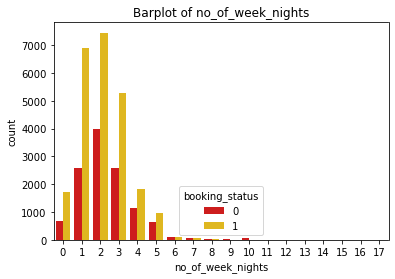

In [142]:
sns.countplot(x='no_of_week_nights', hue='booking_status',data=df,palette='hot')
plt.title('Barplot of no_of_week_nights')

In [143]:
#Hypothesis Testing
from scipy.stats import chi2_contingency
ct_house = pd.crosstab(df.booking_status, df.no_of_week_nights)
chi2_contingency(ct_house, correction = False)
# p_val = 9.99-e, Ho reject, hence association exists, good predictor

(434.5183836997645,
 1.0986460902695565e-81,
 17,
 array([[7.82067402e+02, 3.10861144e+03, 3.74946768e+03, 2.56833949e+03,
         9.79631978e+02, 5.28804686e+02, 6.19232254e+01, 3.70228808e+01,
         2.03134390e+01, 1.11396278e+01, 2.03134390e+01, 5.56981392e+00,
         2.94872502e+00, 1.63818057e+00, 2.29345279e+00, 3.27636113e+00,
         6.55272226e-01, 9.82908339e-01],
        [1.60493260e+03, 6.37938856e+03, 7.69453232e+03, 5.27066051e+03,
         2.01036802e+03, 1.08519531e+03, 1.27076775e+02, 7.59771192e+01,
         4.16865610e+01, 2.28603722e+01, 4.16865610e+01, 1.14301861e+01,
         6.05127498e+00, 3.36181943e+00, 4.70654721e+00, 6.72363887e+00,
         1.34472777e+00, 2.01709166e+00]]))

In [144]:
round(1.0986460902695565e-81,4)

0.0

In [145]:
df.type_of_meal_plan.value_counts()

Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64

Text(0.5, 1.0, 'Barplot of type_of_meal_plan')

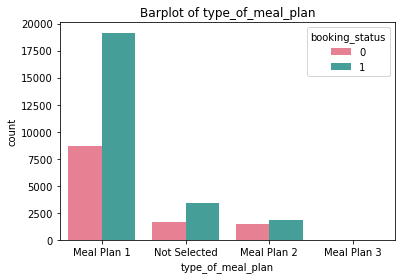

In [146]:
sns.countplot(x='type_of_meal_plan', hue='booking_status',data=df,palette='husl')
plt.title('Barplot of type_of_meal_plan')

In [147]:
#Hypothesis Testing
from scipy.stats import chi2_contingency
ct_house = pd.crosstab(df.booking_status, df.type_of_meal_plan)
chi2_contingency(ct_house, correction = False)

(278.29490920586017,
 4.951915406087789e-60,
 3,
 array([[9.11975121e+03, 1.08283735e+03, 1.63818057e+00, 1.68077326e+03],
        [1.87152488e+04, 2.22216265e+03, 3.36181943e+00, 3.44922674e+03]]))

In [148]:
round(4.951915406087789e-60,4)

0.0

In [149]:
df.type_of_meal_plan.value_counts()

Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64

In [150]:
#Converting to numeric/ integer
df['type_of_meal_plan']=df.get('type_of_meal_plan').replace('Meal Plan 1', 1)
df['type_of_meal_plan']=df.get('type_of_meal_plan').replace('Meal Plan 2', 2)
df['type_of_meal_plan']=df.get('type_of_meal_plan').replace('Meal Plan 3', 3)
df['type_of_meal_plan']=df.get('type_of_meal_plan').replace('Not Selected', 0)

In [151]:
df.type_of_meal_plan.value_counts()

1    27835
0     5130
2     3305
3        5
Name: type_of_meal_plan, dtype: int64

In [152]:
df.required_car_parking_space.value_counts()

0    35151
1     1124
Name: required_car_parking_space, dtype: int64

Text(0.5, 1.0, 'Barplot of required_car_parking_space')

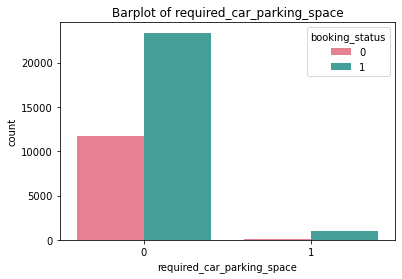

In [153]:
sns.countplot(x='required_car_parking_space', hue='booking_status',data=df,palette='husl')
plt.title('Barplot of required_car_parking_space')

In [154]:
#Hypothesis Testing
from scipy.stats import chi2_contingency
ct_house = pd.crosstab(df.booking_status, df.required_car_parking_space)
chi2_contingency(ct_house, correction = False)

(269.44714368539746,
 1.4976223934666923e-60,
 1,
 array([[11516.73700896,   368.26299104],
        [23634.26299104,   755.73700896]]))

In [155]:
round(1.4976223934666923e-60,4)

0.0

In [156]:
df.room_type_reserved.value_counts()

Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64

In [157]:
# Cat codes
df['room_type_reserved']=df['room_type_reserved'].astype('category').cat.codes

In [158]:
df.room_type_reserved.value_counts()

0    28130
3     6057
5      966
1      692
4      265
6      158
2        7
Name: room_type_reserved, dtype: int64

In [159]:
df.room_type_reserved.unique()

array([0, 3, 1, 5, 4, 6, 2], dtype=int8)

Text(0.5, 1.0, 'Barplot of required_car_parking_space')

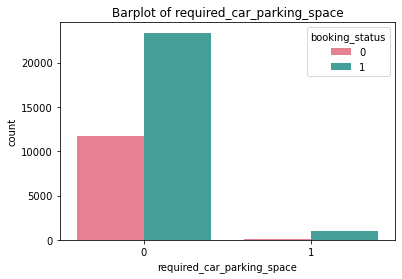

In [160]:
sns.countplot(x='required_car_parking_space', hue='booking_status',data=df,palette='husl')
plt.title('Barplot of required_car_parking_space')

In [161]:
#Hypothesis Testing
from scipy.stats import chi2_contingency
ct_house = pd.crosstab(df.booking_status, df.required_car_parking_space)
chi2_contingency(ct_house, correction = False)

(269.44714368539746,
 1.4976223934666923e-60,
 1,
 array([[11516.73700896,   368.26299104],
        [23634.26299104,   755.73700896]]))

In [162]:
round(1.4976223934666923e-60,4)

0.0

In [163]:
df.room_type_reserved.value_counts()

0    28130
3     6057
5      966
1      692
4      265
6      158
2        7
Name: room_type_reserved, dtype: int64

In [164]:
#Hypothesis Testing
from scipy.stats import chi2_contingency
ct_house = pd.crosstab(df.room_type_reserved, df.booking_status)
chi2_contingency(ct_house, correction = False)

(57.33495179790707,
 1.5627796772447482e-10,
 6,
 array([[9.21640386e+03, 1.89135961e+04],
        [2.26724190e+02, 4.65275810e+02],
        [2.29345279e+00, 4.70654721e+00],
        [1.98449194e+03, 4.07250806e+03],
        [8.68235700e+01, 1.78176430e+02],
        [3.16496485e+02, 6.49503515e+02],
        [5.17665059e+01, 1.06233494e+02]]))

In [165]:
round(3.200747354734445e-15,4)

0.0

In [166]:
df.lead_time.value_counts()

0      1297
1      1078
2       643
3       630
4       628
       ... 
300       1
353       1
328       1
352       1
351       1
Name: lead_time, Length: 352, dtype: int64

C:\Users\chris\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


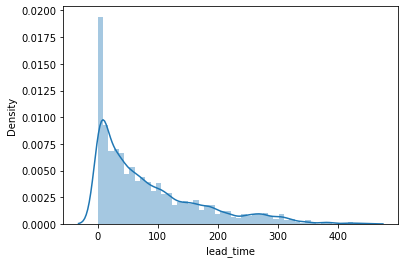

In [167]:

#______histogram

sns.distplot(df['lead_time'])
plt.show()

<AxesSubplot:xlabel='lead_time'>

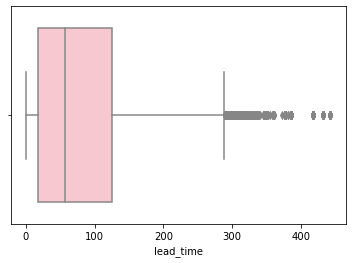

In [168]:
sns.boxplot(data=df, x='lead_time', color='pink')

In [169]:
#Checking outliners, LT is lead_time
LT_IQR = df.lead_time.describe()['75%']-df.lead_time.describe()['25%']
LT_uplim = df.lead_time.describe()['75%']+1.5*LT_IQR
#RH_lolim = df.RH.describe()['25%']-1.5*RH_IQR
#len(df.AP[df.AP > AP_uplim]) #72 outliers
len(df.lead_time[df.lead_time > LT_uplim])

1331

In [170]:
df.lead_time = np.where(df.lead_time>LT_uplim,LT_uplim,df.lead_time)

<AxesSubplot:xlabel='lead_time'>

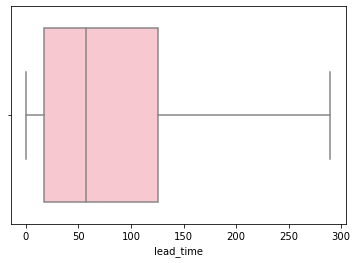

In [171]:
sns.boxplot(data=df, x='lead_time', color='pink')

In [172]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [173]:
df.arrival_year.value_counts()

2018    29761
2017     6514
Name: arrival_year, dtype: int64

Text(0.5, 1.0, 'Barplot of arrival_year')

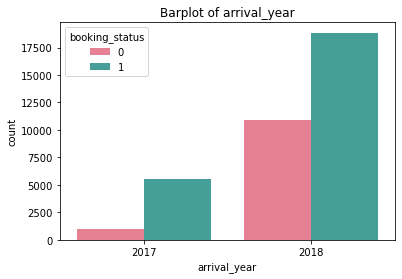

In [174]:
sns.countplot(x='arrival_year', hue='booking_status',data=df,palette='husl')
plt.title('Barplot of arrival_year')

In [175]:
#Hypothesis Testing
from scipy.stats import chi2_contingency
ct_house = pd.crosstab(df.booking_status, df.arrival_year)
chi2_contingency(ct_house, correction = False)

(1169.1658803091102,
 3.065393311072013e-256,
 1,
 array([[ 2134.22164025,  9750.77835975],
        [ 4379.77835975, 20010.22164025]]))

In [176]:
round(3.065393311072013e-256,4)

0.0

In [177]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [178]:
df.arrival_month.value_counts()

10    5317
9     4611
8     3813
6     3203
12    3021
11    2980
7     2920
4     2736
5     2598
3     2358
2     1704
1     1014
Name: arrival_month, dtype: int64

Text(0.5, 1.0, 'Barplot of arrival_month')

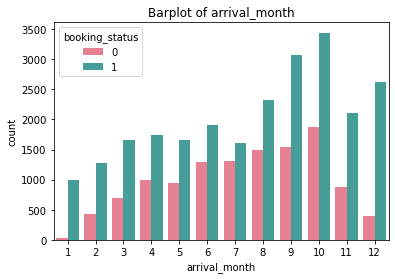

In [179]:
sns.countplot(x='arrival_month', hue='booking_status',data=df,palette='husl')
plt.title('Barplot of arrival_month')

In [180]:
#Hypothesis Testing
from scipy.stats import chi2_contingency
ct_house = pd.crosstab(df.booking_status, df.arrival_month)
chi2_contingency(ct_house, correction = False)

(1412.5959854252537,
 2.3069606491549355e-296,
 11,
 array([[ 332.22301861,  558.2919366 ,  772.56595451,  896.41240524,
          851.19862164, 1049.41847002,  956.69745003, 1249.27649897,
         1510.73011716, 1742.04121296,  976.35561682,  989.78869745],
        [ 681.77698139, 1145.7080634 , 1585.43404549, 1839.58759476,
         1746.80137836, 2153.58152998, 1963.30254997, 2563.72350103,
         3100.26988284, 3574.95878704, 2003.64438318, 2031.21130255]]))

In [181]:
round(2.3069606491549355e-296,4)

0.0

In [182]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [183]:
df.arrival_date.value_counts()

13    1358
17    1345
2     1331
4     1327
19    1327
16    1306
20    1281
15    1273
6     1273
18    1260
14    1242
30    1216
12    1204
8     1198
29    1190
21    1158
5     1154
26    1146
25    1146
1     1133
9     1130
28    1129
7     1110
24    1103
11    1098
3     1098
10    1089
27    1059
22    1023
23     990
31     578
Name: arrival_date, dtype: int64

Text(0.5, 1.0, 'Barplot of arrival_month')

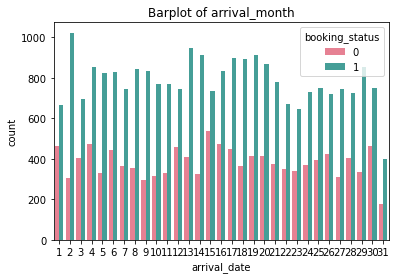

In [184]:
sns.countplot(x='arrival_date', hue='booking_status',data=df,palette='husl')
plt.title('Barplot of arrival_month')

In [185]:
#Hypothesis Testing
from scipy.stats import chi2_contingency
ct_house = pd.crosstab(df.booking_status, df.arrival_date)
chi2_contingency(ct_house, correction = False)

(321.6444289783148,
 1.3915931305634915e-50,
 30,
 array([[371.21171606, 436.08366644, 359.7444521 , 434.77312198,
         378.09207443, 417.08077188, 363.67608546, 392.5080634 ,
         370.22880772, 356.79572708, 359.7444521 , 394.47388008,
         444.92984149, 406.92405238, 417.08077188, 427.89276361,
         440.67057202, 412.82150241, 434.77312198, 419.70186079,
         379.40261888, 335.17174363, 324.3597519 , 361.38263267,
         375.47098553, 375.47098553, 346.96664369, 369.90117161,
         389.8869745 , 398.40551344, 189.37367333],
        [761.78828394, 894.91633356, 738.2555479 , 892.22687802,
         775.90792557, 855.91922812, 746.32391454, 805.4919366 ,
         759.77119228, 732.20427292, 738.2555479 , 809.52611992,
         913.07015851, 835.07594762, 855.91922812, 878.10723639,
         904.32942798, 847.17849759, 892.22687802, 861.29813921,
         778.59738112, 687.82825637, 665.6402481 , 741.61736733,
         770.52901447, 770.52901447, 712.03335631, 75

In [186]:
round(1.3915931305634915e-50,4)

0.0

In [187]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [188]:
df.market_segment_type.value_counts()

Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64

In [189]:
# Cat codes
df['market_segment_type']=df['market_segment_type'].astype('category').cat.codes

In [190]:
df.market_segment_type.value_counts()

4    23214
3    10528
2     2017
1      391
0      125
Name: market_segment_type, dtype: int64

Text(0.5, 1.0, 'Barplot of market_segment')

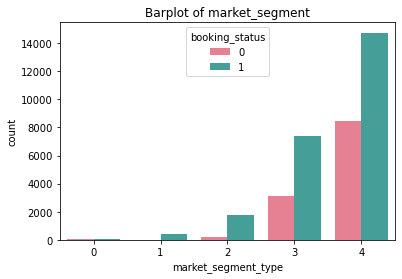

In [191]:
sns.countplot(x='market_segment_type', hue='booking_status',data=df,palette='husl')
plt.title('Barplot of market_segment')

In [192]:
#Hypothesis Testing
from scipy.stats import chi2_contingency
ct_house = pd.crosstab(df.booking_status, df.market_segment_type)
chi2_contingency(ct_house, correction = False)

(814.1088652405568,
 6.74876302455762e-175,
 4,
 array([[   40.95451413,   128.10572019,   660.84203997,  3449.35299793,
          7605.74472777],
        [   84.04548587,   262.89427981,  1356.15796003,  7078.64700207,
         15608.25527223]]))

In [193]:
round(6.74876302455762e-175,4)

0.0

In [194]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [195]:
df.repeated_guest.value_counts()

0    35345
1      930
Name: repeated_guest, dtype: int64

Text(0.5, 1.0, 'Barplot of repeated_guest')

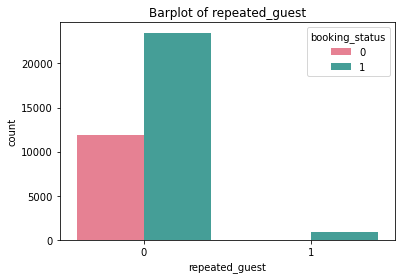

In [196]:
sns.countplot(x='repeated_guest', hue='booking_status',data=df,palette='husl')
plt.title('Barplot of repeated_guest')

In [197]:
#Hypothesis Testing
from scipy.stats import chi2_contingency
ct_house = pd.crosstab(df.booking_status, df.repeated_guest)
chi2_contingency(ct_house, correction = False)

(417.540569427854,
 8.370937808836557e-93,
 1,
 array([[11580.29841489,   304.70158511],
        [23764.70158511,   625.29841489]]))

In [198]:
round(8.370937808836557e-93,4)

0.0

In [199]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [200]:
df.no_of_previous_cancellations.value_counts()

0     35937
1       198
2        46
3        43
11       25
5        11
4        10
13        4
6         1
Name: no_of_previous_cancellations, dtype: int64

Text(0.5, 1.0, 'Barplot of no_of_previous_cancellations')

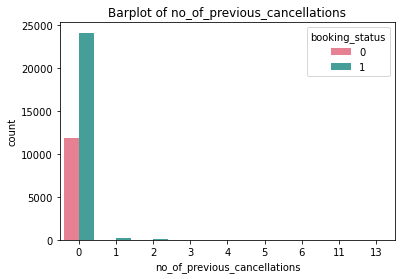

In [201]:
sns.countplot(x='no_of_previous_cancellations', hue='booking_status',data=df,palette='husl')
plt.title('Barplot of no_of_previous_cancellations')

In [202]:
#Hypothesis Testing
from scipy.stats import chi2_contingency
ct_house = pd.crosstab(df.booking_status, df.no_of_previous_cancellations)
chi2_contingency(ct_house, correction = False)

(139.2820121236975,
 3.3464027245396504e-26,
 8,
 array([[1.17742590e+04, 6.48719504e+01, 1.50712612e+01, 1.40883529e+01,
         3.27636113e+00, 3.60399724e+00, 3.27636113e-01, 8.19090283e+00,
         1.31054445e+00],
        [2.41627410e+04, 1.33128050e+02, 3.09287388e+01, 2.89116471e+01,
         6.72363887e+00, 7.39600276e+00, 6.72363887e-01, 1.68090972e+01,
         2.68945555e+00]]))

In [203]:
round(3.3464027245396504e-26,4)

0.0

In [204]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [205]:
df.avg_price_per_room.value_counts()

65.00     848
75.00     826
90.00     703
95.00     669
115.00    662
         ... 
212.42      1
83.48       1
70.42       1
130.99      1
167.80      1
Name: avg_price_per_room, Length: 3930, dtype: int64

C:\Users\chris\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


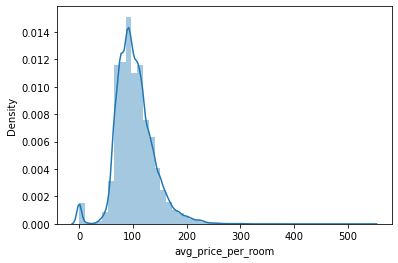

In [206]:
sns.distplot(df['avg_price_per_room'])
plt.show()

<AxesSubplot:xlabel='avg_price_per_room'>

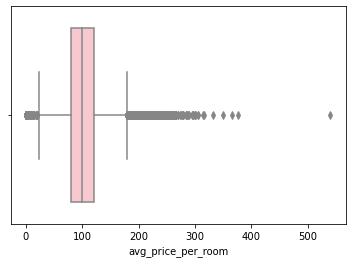

In [207]:
sns.boxplot(data=df, x='avg_price_per_room', color='pink')

In [208]:
IQR = df.avg_price_per_room.describe()['75%']-df.avg_price_per_room.describe()['25%']
uplim = df.avg_price_per_room.describe()['75%']+1.5*IQR
lolim = df.avg_price_per_room.describe()['25%']-1.5*IQR
print(len(df.avg_price_per_room[df.avg_price_per_room > uplim]))#1069
print(len(df.avg_price_per_room[df.avg_price_per_room<lolim]))#627

1069
627


In [209]:
df.avg_price_per_room = np.where(df.avg_price_per_room>uplim,uplim,df.avg_price_per_room)
df.avg_price_per_room = np.where(df.avg_price_per_room<lolim,lolim,df.avg_price_per_room)

<AxesSubplot:xlabel='avg_price_per_room'>

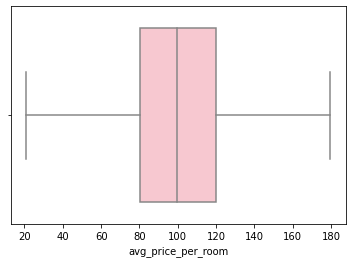

In [210]:
sns.boxplot(data=df, x='avg_price_per_room', color='pink')

In [211]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [212]:
df.no_of_special_requests.value_counts()

0    19777
1    11373
2     4364
3      675
4       78
5        8
Name: no_of_special_requests, dtype: int64

Text(0.5, 1.0, 'Barplot of no_of_special_requests')

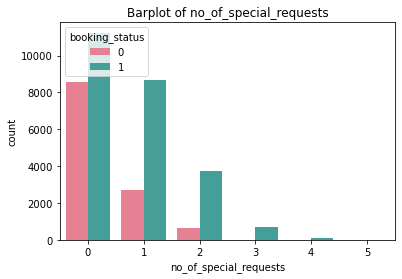

In [213]:
sns.countplot(x='no_of_special_requests', hue='booking_status',data=df,palette='husl')
plt.title('Barplot of no_of_special_requests')

In [214]:
#Hypothesis Testing
from scipy.stats import chi2_contingency
ct_house = pd.crosstab(df.booking_status, df.no_of_special_requests)
chi2_contingency(ct_house, correction = False)

(2421.6187208019905,
 0.0,
 5,
 array([[6.47965941e+03, 3.72620551e+03, 1.42980400e+03, 2.21154376e+02,
         2.55556168e+01, 2.62108890e+00],
        [1.32973406e+04, 7.64679449e+03, 2.93419600e+03, 4.53845624e+02,
         5.24443832e+01, 5.37891110e+00]]))

In [215]:
#_______________VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor



In [216]:
# first put your predictors in x
x = df.iloc[:, [7,15]] # x is a data frame


In [217]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns 
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]
  
print(vif_data) # two columns, feature & VIF will appear

              feature       VIF
0           lead_time  1.820821
1  avg_price_per_room  1.820821


In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  int64  
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  int8   
 7   lead_time                             36275 non-null  float64
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_

In [219]:
#TRAIN TEST SPLIT
# X and y
x = df.loc[:, df.columns != 'booking_status']
y = df.loc[:, df.columns == 'booking_status']

In [220]:
# Selecting important features based on RandomForest

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .25, random_state=20)

In [221]:
x_train.shape

(27206, 17)

In [222]:
y_test.shape

(9069, 1)

In [223]:
S_Model = SelectFromModel(RandomForestClassifier(n_estimators = 100))

S_Model.fit(x_train, y_train)

C:\Users\chris\anaconda3\lib\site-packages\sklearn\feature_selection\_from_model.py:267: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


SelectFromModel(estimator=RandomForestClassifier())

In [224]:
S_Model.get_support()


array([False, False, False, False, False, False, False,  True, False,
        True,  True, False, False, False, False,  True,  True])

In [225]:
S_Feat = x_train.columns[(S_Model.get_support())]
len(S_Feat)

5

In [226]:
print(S_Feat)

Index(['lead_time', 'arrival_month', 'arrival_date', 'avg_price_per_room',
       'no_of_special_requests'],
      dtype='object')


In [227]:
RFC = RandomForestClassifier(n_estimators = 150)
random_forest = RFC.fit(x_train, y_train)

C:\Users\chris\AppData\Local\Temp\ipykernel_20580\989341615.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest = RFC.fit(x_train, y_train)


In [228]:
imp_df = pd.DataFrame({
    "columns": x_train.columns,
    "Imp": RFC.feature_importances_
})

In [229]:
imp_df.sort_values(by="Imp", ascending=False)

,columns,Imp
7,lead_time,0.319419
15,avg_price_per_room,0.161462
16,no_of_special_requests,0.095110
10,arrival_date,0.091750
9,arrival_month,0.080207
11,market_segment_type,0.054676
3,no_of_week_nights,0.053072
2,no_of_weekend_nights,0.037497
8,arrival_year,0.024782
0,no_of_adults,0.024344


In [230]:
#Handling unbalanced data using SMOTE

In [235]:
from sklearn.utils import resample

In [236]:
df.booking_status.value_counts()

1    24390
0    11885
Name: booking_status, dtype: int64

In [237]:
not_booking_status = df[df.booking_status == 0]
len(not_booking_status)

11885

In [238]:
yes_booking_status = df[df.booking_status == 1]
len(yes_booking_status)

24390

In [239]:
booking_status_df = resample(yes_booking_status, replace = True, n_samples = len(not_booking_status), random_state =20)

In [240]:
booking_status_df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
23316,2,0,2,5,0,0,0,144.0,2018,9,7,4,0,0,0,116.10,1,1
6461,2,0,0,3,1,0,0,188.0,2018,6,2,3,0,0,0,80.75,0,1
35329,2,0,2,1,2,0,0,124.0,2017,8,8,3,0,0,0,94.50,0,1
34815,3,0,0,5,1,0,3,35.0,2018,4,19,4,0,0,0,136.62,3,1
21835,2,0,1,2,1,0,0,126.0,2018,7,25,4,0,0,0,77.03,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33050,1,0,0,2,0,0,0,0.0,2018,6,21,4,0,0,0,129.00,1,1
5214,1,0,0,2,1,1,0,12.0,2018,2,16,2,1,0,4,67.00,1,1
24979,2,1,2,5,1,0,0,150.0,2018,9,18,4,0,0,0,91.12,0,1
32971,2,0,0,1,0,0,0,101.0,2018,7,15,4,0,0,0,94.50,2,1


In [241]:
balanced_df = pd.concat([not_booking_status, booking_status_df])

In [242]:
balanced_df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
2,1,0,2,1,1,0,0,1.0,2018,2,28,4,0,0,0,60.00,0,0
3,2,0,0,2,1,0,0,211.0,2018,5,20,4,0,0,0,100.00,0,0
4,2,0,1,1,0,0,0,48.0,2018,4,11,4,0,0,0,94.50,0,0
5,2,0,0,2,2,0,0,289.5,2018,9,13,4,0,0,0,115.00,1,0
12,2,0,2,1,0,0,0,30.0,2018,11,26,4,0,0,0,88.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33050,1,0,0,2,0,0,0,0.0,2018,6,21,4,0,0,0,129.00,1,1
5214,1,0,0,2,1,1,0,12.0,2018,2,16,2,1,0,4,67.00,1,1
24979,2,1,2,5,1,0,0,150.0,2018,9,18,4,0,0,0,91.12,0,1
32971,2,0,0,1,0,0,0,101.0,2018,7,15,4,0,0,0,94.50,2,1


In [243]:
y_train.value_counts()

booking_status
1                 18355
0                  8851
dtype: int64

In [244]:
from imblearn.over_sampling import SMOTE

In [245]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [246]:
SM = SMOTE(random_state = 6)

In [247]:
SM_x, SM_y = SM.fit_resample(x_train, y_train)

In [248]:
SM_y.value_counts()

booking_status
0                 18355
1                 18355
dtype: int64

In [249]:
# Standardize the data using the anyone of the scalers provided by sklearn

In [250]:
from sklearn.preprocessing import StandardScaler

In [251]:
df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,1,0,0,224.0,2017,10,2,3,0,0,0,65.00,0,1
1,2,0,2,3,0,0,0,5.0,2018,11,6,4,0,0,0,106.68,1,1
2,1,0,2,1,1,0,0,1.0,2018,2,28,4,0,0,0,60.00,0,0
3,2,0,0,2,1,0,0,211.0,2018,5,20,4,0,0,0,100.00,0,0
4,2,0,1,1,0,0,0,48.0,2018,4,11,4,0,0,0,94.50,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,1,0,3,85.0,2018,8,3,4,0,0,0,167.80,1,1
36271,2,0,1,3,1,0,0,228.0,2018,10,17,4,0,0,0,90.95,2,0
36272,2,0,2,6,1,0,0,148.0,2018,7,1,4,0,0,0,98.39,2,1
36273,2,0,0,3,0,0,0,63.0,2018,4,21,4,0,0,0,94.50,0,0


In [252]:
Num_Features = balanced_df[['lead_time','arrival_year','arrival_month','arrival_date','avg_price_per_room']]

In [253]:
Num_Features

,lead_time,arrival_year,arrival_month,arrival_date,avg_price_per_room
2,1.0,2018,2,28,60.00
3,211.0,2018,5,20,100.00
4,48.0,2018,4,11,94.50
5,289.5,2018,9,13,115.00
12,30.0,2018,11,26,88.00
...,...,...,...,...,...
33050,0.0,2018,6,21,129.00
5214,12.0,2018,2,16,67.00
24979,150.0,2018,9,18,91.12
32971,101.0,2018,7,15,94.50


In [254]:
from sklearn.preprocessing import MinMaxScaler

In [255]:
MM_Scaler = MinMaxScaler()

In [256]:
Columns = Num_Features.columns

In [257]:
Num_Features = MM_Scaler.fit_transform(Num_Features)

In [258]:
Num_Features

array([[0.00345423, 1.        , 0.09090909, 0.9       , 0.24716625],
       [0.72884283, 1.        , 0.36363636, 0.63333333, 0.49905542],
       [0.16580311, 1.        , 0.27272727, 0.33333333, 0.46442065],
       ...,
       [0.51813472, 1.        , 0.72727273, 0.56666667, 0.44313602],
       [0.34887737, 1.        , 0.54545455, 0.46666667, 0.46442065],
       [0.        , 1.        , 0.        , 0.56666667, 0.27550378]])

In [259]:
df_Num_Features = pd.DataFrame(Num_Features, columns = Columns)

In [260]:
df_Num_Features

,lead_time,arrival_year,arrival_month,arrival_date,avg_price_per_room
0,0.003454,1.0,0.090909,0.900000,0.247166
1,0.728843,1.0,0.363636,0.633333,0.499055
2,0.165803,1.0,0.272727,0.333333,0.464421
3,1.000000,1.0,0.727273,0.400000,0.593514
4,0.103627,1.0,0.909091,0.833333,0.423489
...,...,...,...,...,...
23765,0.000000,1.0,0.454545,0.666667,0.681675
23766,0.041451,1.0,0.090909,0.500000,0.291247
23767,0.518135,1.0,0.727273,0.566667,0.443136
23768,0.348877,1.0,0.545455,0.466667,0.464421


In [261]:
Sc_df = balanced_df.copy()

In [262]:
Sc_df = balanced_df.drop(['lead_time','arrival_year','arrival_month','arrival_date','avg_price_per_room'], axis = 1)

In [263]:
Sc_df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,no_of_special_requests,booking_status
2,1,0,2,1,1,0,0,4,0,0,0,0,0
3,2,0,0,2,1,0,0,4,0,0,0,0,0
4,2,0,1,1,0,0,0,4,0,0,0,0,0
5,2,0,0,2,2,0,0,4,0,0,0,1,0
12,2,0,2,1,0,0,0,4,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33050,1,0,0,2,0,0,0,4,0,0,0,1,1
5214,1,0,0,2,1,1,0,2,1,0,4,1,1
24979,2,1,2,5,1,0,0,4,0,0,0,0,1
32971,2,0,0,1,0,0,0,4,0,0,0,2,1


In [264]:
Sc_df.reset_index(inplace = True, drop = True)

In [265]:
Sc_df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,no_of_special_requests,booking_status
0,1,0,2,1,1,0,0,4,0,0,0,0,0
1,2,0,0,2,1,0,0,4,0,0,0,0,0
2,2,0,1,1,0,0,0,4,0,0,0,0,0
3,2,0,0,2,2,0,0,4,0,0,0,1,0
4,2,0,2,1,0,0,0,4,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23765,1,0,0,2,0,0,0,4,0,0,0,1,1
23766,1,0,0,2,1,1,0,2,1,0,4,1,1
23767,2,1,2,5,1,0,0,4,0,0,0,0,1
23768,2,0,0,1,0,0,0,4,0,0,0,2,1


In [266]:
data1 = pd.concat([df_Num_Features, Sc_df], axis = 1)

In [267]:
data1

,lead_time,arrival_year,arrival_month,arrival_date,avg_price_per_room,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,no_of_special_requests,booking_status
0,0.003454,1.0,0.090909,0.900000,0.247166,1,0,2,1,1,0,0,4,0,0,0,0,0
1,0.728843,1.0,0.363636,0.633333,0.499055,2,0,0,2,1,0,0,4,0,0,0,0,0
2,0.165803,1.0,0.272727,0.333333,0.464421,2,0,1,1,0,0,0,4,0,0,0,0,0
3,1.000000,1.0,0.727273,0.400000,0.593514,2,0,0,2,2,0,0,4,0,0,0,1,0
4,0.103627,1.0,0.909091,0.833333,0.423489,2,0,2,1,0,0,0,4,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23765,0.000000,1.0,0.454545,0.666667,0.681675,1,0,0,2,0,0,0,4,0,0,0,1,1
23766,0.041451,1.0,0.090909,0.500000,0.291247,1,0,0,2,1,1,0,2,1,0,4,1,1
23767,0.518135,1.0,0.727273,0.566667,0.443136,2,1,2,5,1,0,0,4,0,0,0,0,1
23768,0.348877,1.0,0.545455,0.466667,0.464421,2,0,0,1,0,0,0,4,0,0,0,2,1


 Supervised Learning models: a. Logistic Regression b. AdaBoost c. Naïve Bayes d. KNN e. SVM

a. Logistic Regression

In [268]:
x = data1.drop(['booking_status'], axis = 1)

In [269]:
x

,lead_time,arrival_year,arrival_month,arrival_date,avg_price_per_room,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,no_of_special_requests
0,0.003454,1.0,0.090909,0.900000,0.247166,1,0,2,1,1,0,0,4,0,0,0,0
1,0.728843,1.0,0.363636,0.633333,0.499055,2,0,0,2,1,0,0,4,0,0,0,0
2,0.165803,1.0,0.272727,0.333333,0.464421,2,0,1,1,0,0,0,4,0,0,0,0
3,1.000000,1.0,0.727273,0.400000,0.593514,2,0,0,2,2,0,0,4,0,0,0,1
4,0.103627,1.0,0.909091,0.833333,0.423489,2,0,2,1,0,0,0,4,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23765,0.000000,1.0,0.454545,0.666667,0.681675,1,0,0,2,0,0,0,4,0,0,0,1
23766,0.041451,1.0,0.090909,0.500000,0.291247,1,0,0,2,1,1,0,2,1,0,4,1
23767,0.518135,1.0,0.727273,0.566667,0.443136,2,1,2,5,1,0,0,4,0,0,0,0
23768,0.348877,1.0,0.545455,0.466667,0.464421,2,0,0,1,0,0,0,4,0,0,0,2


In [270]:
y = data1['booking_status']

In [271]:
y

0        0
1        0
2        0
3        0
4        0
        ..
23765    1
23766    1
23767    1
23768    1
23769    1
Name: booking_status, Length: 23770, dtype: int8

In [272]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .2, random_state = 6)

In [273]:
x_train.shape

(19016, 17)

In [274]:
y_train.shape

(19016,)

In [275]:
y_test.shape

(4754,)

In [276]:
y_test.shape

(4754,)

In [277]:
from sklearn.linear_model import LogisticRegression

In [278]:
Logi_Reg = LogisticRegression()

In [279]:
LR_Model = Logi_Reg.fit(x_train, y_train)

C:\Users\chris\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [280]:
Logi_Pred = LR_Model.predict(x_test)

In [281]:
Logi_Pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int8)

In [282]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [283]:
#Confusion matrix
pd.crosstab(y_test, Logi_Pred, rownames = ['Actual'], colnames = ['Predicted'], margins = True)

Predicted,0,1,All
Actual,,,
0,1864,526,2390
1,499,1865,2364
All,2363,2391,4754


In [284]:
confusion_matrix(y_test, Logi_Pred)

array([[1864,  526],
       [ 499, 1865]], dtype=int64)

In [285]:
# classification_report
print(classification_report(y_test, Logi_Pred))

              precision    recall  f1-score   support

           0       0.79      0.78      0.78      2390
           1       0.78      0.79      0.78      2364

    accuracy                           0.78      4754
   macro avg       0.78      0.78      0.78      4754
weighted avg       0.78      0.78      0.78      4754



In [286]:
# accuracy_score 
Logi_accuracy = accuracy_score(y_test, Logi_Pred)
Logi_accuracy

0.7843920908708456

In [287]:
# f1_score 
from sklearn.metrics import f1_score

In [288]:
#define array of actual classes
actual = np.repeat([1, 0], repeats = [2390, 2364])


In [289]:
# define array of predicted classes
pred = np.repeat([1, 0, 1, 0], repeats = [1864,  526, 499, 1865] )

In [290]:
# claculate F1 score
f1_score(actual, pred)

0.7843467283820744

In [291]:
# AUC
y_predict = LR_Model.predict_proba(x)
y_predict[:, 1]
plt.show()

In [292]:
# ROC Curve - Receiver Operating Characteristic curve
# threshold
# tpr = True Positive Rate
# fpr = False Positive Rate
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [293]:
fpr, tpr, thresholds = metrics.roc_curve(y, y_predict[:, 1])
roc_auc = metrics.auc(fpr, tpr)
print('AUC Score : ', round(roc_auc, 3))

AUC Score :  0.857


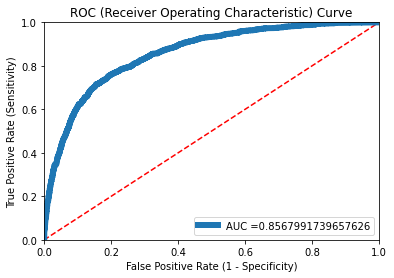

In [294]:
# ROC Curve
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC (Receiver Operating Characteristic) Curve')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot(fpr, tpr, label = 'AUC =' + str(roc_auc), lw = 6)
plt.legend(loc = 4)
plt.show()

In [295]:
# With important features
x1 = data1[['lead_time', 'avg_price_per_room', 'no_of_special_requests', 'arrival_date','arrival_month','market_segment_type']]
x1

,lead_time,avg_price_per_room,no_of_special_requests,arrival_date,arrival_month,market_segment_type
0,0.003454,0.247166,0,0.900000,0.090909,4
1,0.728843,0.499055,0,0.633333,0.363636,4
2,0.165803,0.464421,0,0.333333,0.272727,4
3,1.000000,0.593514,1,0.400000,0.727273,4
4,0.103627,0.423489,0,0.833333,0.909091,4
...,...,...,...,...,...,...
23765,0.000000,0.681675,1,0.666667,0.454545,4
23766,0.041451,0.291247,1,0.500000,0.090909,2
23767,0.518135,0.443136,0,0.566667,0.727273,4
23768,0.348877,0.464421,2,0.466667,0.545455,4


In [296]:
y1 = data1['booking_status']
y1

0        0
1        0
2        0
3        0
4        0
        ..
23765    1
23766    1
23767    1
23768    1
23769    1
Name: booking_status, Length: 23770, dtype: int8

In [297]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size = .2, random_state = 6)

In [298]:
x_train1.shape

(19016, 6)

In [299]:
x_test1.shape

(4754, 6)

In [300]:
y_train1.shape

(19016,)

In [301]:
y_test1.shape

(4754,)

In [302]:
LR_Model_imp = Logi_Reg.fit(x_train1, y_train1)

In [303]:
Logi_Pred_imp = LR_Model_imp.predict(x_test1)
Logi_Pred_imp

array([1, 1, 1, ..., 1, 1, 1], dtype=int8)

In [304]:
# confusion_matrix
pd.crosstab(y_test1, Logi_Pred_imp, rownames = ['Actual'], colnames = ['Predicted'], margins = True)

Predicted,0,1,All
Actual,,,
0,1828,562,2390
1,512,1852,2364
All,2340,2414,4754


In [305]:
confusion_matrix(y_test1, Logi_Pred_imp)

array([[1828,  562],
       [ 512, 1852]], dtype=int64)

In [306]:
# classification_report
print(classification_report(y_test1, Logi_Pred_imp))

              precision    recall  f1-score   support

           0       0.78      0.76      0.77      2390
           1       0.77      0.78      0.78      2364

    accuracy                           0.77      4754
   macro avg       0.77      0.77      0.77      4754
weighted avg       0.77      0.77      0.77      4754



In [307]:
# accuracy_score
Logi_accuracy_imp = accuracy_score(y_test1, Logi_Pred_imp)
Logi_accuracy_imp

0.7740849810685738

In [308]:
# f1_score
from sklearn.metrics import f1_score

In [309]:
# define array of actual classes
actual1 = np.repeat([1, 0], repeats = [2390, 2364])

In [310]:
# define array of predicted classes
pred1 = np.repeat([1, 0, 1, 0], repeats = [1828, 562, 512, 1852])

In [311]:
# calculate F1 score
f1_score(actual1, pred1)

0.772938689217759

In [312]:
# AUC
y_predict1 = LR_Model_imp.predict_proba(x1)
y_predict1[:, 1]
plt.show()

In [313]:
# ROC Curve - Receiver Operating Characteristic curve
# threshold
# tpr = True Positive Rate
# fpr = False Positive Rate
fpr, tpr, thresholds = roc_curve(y1, y_predict1[:, 1])
roc_auc = auc(fpr, tpr)
print('AUC Score : ', round(roc_auc, 3))

AUC Score :  0.852


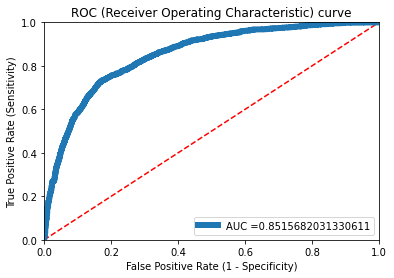

In [314]:
# ROC Curve
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC (Receiver Operating Characteristic) curve')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot(fpr, tpr, label = 'AUC =' + str(roc_auc), lw = 6)
plt.legend(loc = 4)
plt.show()

Adaboost

In [315]:
x = data1.drop(['booking_status'], axis = 1)

In [316]:
x

,lead_time,arrival_year,arrival_month,arrival_date,avg_price_per_room,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,no_of_special_requests
0,0.003454,1.0,0.090909,0.900000,0.247166,1,0,2,1,1,0,0,4,0,0,0,0
1,0.728843,1.0,0.363636,0.633333,0.499055,2,0,0,2,1,0,0,4,0,0,0,0
2,0.165803,1.0,0.272727,0.333333,0.464421,2,0,1,1,0,0,0,4,0,0,0,0
3,1.000000,1.0,0.727273,0.400000,0.593514,2,0,0,2,2,0,0,4,0,0,0,1
4,0.103627,1.0,0.909091,0.833333,0.423489,2,0,2,1,0,0,0,4,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23765,0.000000,1.0,0.454545,0.666667,0.681675,1,0,0,2,0,0,0,4,0,0,0,1
23766,0.041451,1.0,0.090909,0.500000,0.291247,1,0,0,2,1,1,0,2,1,0,4,1
23767,0.518135,1.0,0.727273,0.566667,0.443136,2,1,2,5,1,0,0,4,0,0,0,0
23768,0.348877,1.0,0.545455,0.466667,0.464421,2,0,0,1,0,0,0,4,0,0,0,2


In [317]:
y = data1['booking_status']

In [318]:
y

0        0
1        0
2        0
3        0
4        0
        ..
23765    1
23766    1
23767    1
23768    1
23769    1
Name: booking_status, Length: 23770, dtype: int8

In [319]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .25, random_state = 6)


In [320]:
x_train.shape

(17827, 17)

In [321]:
x_test.shape

(5943, 17)

In [322]:
y_train.shape

(17827,)

In [323]:
y_test.shape

(5943,)

In [324]:
from sklearn.ensemble import AdaBoostClassifier
Ada = AdaBoostClassifier()


In [325]:
Ada_Model = Ada.fit(x_train, y_train)

In [326]:
Ada_Pred = Ada_Model.predict(x_test)

In [327]:
Ada_Pred

array([1, 1, 0, ..., 1, 0, 0], dtype=int8)

In [328]:
# confusion_matrix

pd.crosstab(y_test, Ada_Pred, rownames = ['Actual'], colnames = ['Predicted'], margins = True)

Predicted,0,1,All
Actual,,,
0,2357,612,2969
1,590,2384,2974
All,2947,2996,5943


In [329]:
confusion_matrix(y_test, Ada_Pred)

array([[2357,  612],
       [ 590, 2384]], dtype=int64)

In [330]:
# classification_report
print(classification_report(y_test, Ada_Pred))

              precision    recall  f1-score   support

           0       0.80      0.79      0.80      2969
           1       0.80      0.80      0.80      2974

    accuracy                           0.80      5943
   macro avg       0.80      0.80      0.80      5943
weighted avg       0.80      0.80      0.80      5943



In [331]:
# accuracy_score
Ada_accuracy = accuracy_score(y_test, Ada_Pred)
Ada_accuracy

0.7977452465084974

In [332]:
# f1_score
from sklearn.metrics import f1_score

In [333]:
# define array of actual classes
actual = np.repeat([1, 0], repeats = [2969, 2974])

In [334]:
# define array of predicted classes
pred = np.repeat([1, 0, 1, 0], repeats = [2357, 612, 590, 2384])

In [335]:
# claculate F1 score
f1_score(actual, pred)

0.7968221771467208

In [336]:
# AUC
y_predict = Ada_Model.predict_proba(x)
y_predict[:, 1]
plt.show()

In [337]:
# ROC Curve - Receiver Operating Characteristic curve
# threshold
# tpr = True Positive Rate
# fpr = False Positive Rate
fpr, tpr, thresholds = roc_curve(y, y_predict[:, 1])
roc_auc = auc(fpr, tpr)
print('AUC Score : ', round(roc_auc, 3))

AUC Score :  0.882


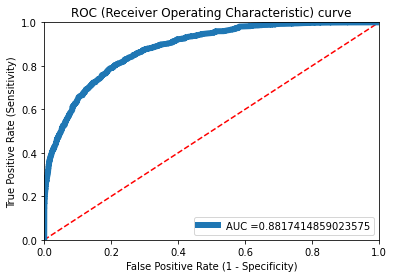

In [338]:
# ROC Curve
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC (Receiver Operating Characteristic) curve')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot(fpr, tpr, label = 'AUC =' + str(roc_auc), lw = 6)
plt.legend(loc = 4)
plt.show()

In [339]:
# With important features
x1 = data1[['lead_time', 'avg_price_per_room', 'no_of_special_requests', 'arrival_date','arrival_month','market_segment_type']]


In [340]:
x1

,lead_time,avg_price_per_room,no_of_special_requests,arrival_date,arrival_month,market_segment_type
0,0.003454,0.247166,0,0.900000,0.090909,4
1,0.728843,0.499055,0,0.633333,0.363636,4
2,0.165803,0.464421,0,0.333333,0.272727,4
3,1.000000,0.593514,1,0.400000,0.727273,4
4,0.103627,0.423489,0,0.833333,0.909091,4
...,...,...,...,...,...,...
23765,0.000000,0.681675,1,0.666667,0.454545,4
23766,0.041451,0.291247,1,0.500000,0.090909,2
23767,0.518135,0.443136,0,0.566667,0.727273,4
23768,0.348877,0.464421,2,0.466667,0.545455,4


In [341]:
y1 = data1['booking_status']


In [342]:
y1

0        0
1        0
2        0
3        0
4        0
        ..
23765    1
23766    1
23767    1
23768    1
23769    1
Name: booking_status, Length: 23770, dtype: int8

In [343]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size = .25, random_state = 6)

In [344]:
x_train1.shape


(17827, 6)

In [345]:
x_test1.shape

(5943, 6)

In [346]:
y_train1.shape

(17827,)

In [347]:
y_test1.shape

(5943,)

In [348]:
Ada_Model1 = Ada.fit(x_train1, y_train1)

In [349]:
Ada_Pred1 = Ada_Model1.predict(x_test1)

In [350]:
Ada_Pred1

array([1, 1, 1, ..., 1, 0, 0], dtype=int8)

In [351]:
#Confusion matrix

pd.crosstab(y_test1, Ada_Pred1, rownames = ['Actual'], colnames = ['Predicted'], margins = True)

Predicted,0,1,All
Actual,,,
0,2333,636,2969
1,573,2401,2974
All,2906,3037,5943


In [352]:
confusion_matrix(y_test1, Ada_Pred1)

array([[2333,  636],
       [ 573, 2401]], dtype=int64)

In [353]:
# classification_report
print(classification_report(y_test1, Ada_Pred1))

              precision    recall  f1-score   support

           0       0.80      0.79      0.79      2969
           1       0.79      0.81      0.80      2974

    accuracy                           0.80      5943
   macro avg       0.80      0.80      0.80      5943
weighted avg       0.80      0.80      0.80      5943



In [354]:
# accuracy_score
Ada_accuracy_imp = accuracy_score(y_test1, Ada_Pred1)
Ada_accuracy_imp

0.7965673902069662

In [355]:
# f1_score
from sklearn.metrics import f1_score

In [356]:
# define array of actual classes
actual1 = np.repeat([1, 0], repeats = [2969, 2974])

In [357]:
# define array of predicted classes
pred1 = np.repeat([1, 0, 1, 0], repeats = [2333, 636, 573, 2401])

In [358]:
# calculate F1 score
f1_score(actual1, pred1)

0.7942127659574467

In [359]:
# AUC
y_predict1 = Ada_Model.predict_proba(x1)
y_predict1[:, 1]
plt.show()

In [360]:
#ROC Curve - Receiver Operating Characteristic curve
### threshold
#tpr = True Positive Rate 
#fpr = False Positive Rate
from sklearn.metrics import roc_curve, auc, roc_auc_score
fpr, tpr, thresholds = roc_curve(y1, y_predict1[:,1])
roc_auc = auc(fpr, tpr)
print("AUC Score : ", round(roc_auc, 3))

AUC Score :  0.877


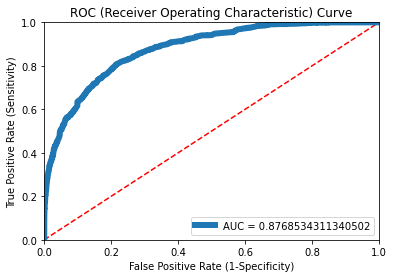

In [361]:
# ROC Curve
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC (Receiver Operating Characteristic) Curve')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot(fpr, tpr, label = 'AUC = ' + str(roc_auc), lw=6)
plt.legend(loc=4)
plt.show()

Naive Bayes

In [362]:
from sklearn.naive_bayes import GaussianNB

In [363]:
NB = GaussianNB()

In [364]:
NB_Model = NB.fit(x_train, y_train)

In [365]:
NB_Pred = NB_Model.predict(x_test)

In [366]:
NB_Pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [367]:
# confusion_matrix

pd.crosstab(y_test, NB_Pred, rownames = ['Actual'], colnames = ['Predicted'], margins = True)

Predicted,0,1,All
Actual,,,
0,2905,64,2969
1,2478,496,2974
All,5383,560,5943


In [368]:
confusion_matrix(y_test, NB_Pred)

array([[2905,   64],
       [2478,  496]], dtype=int64)

In [369]:
# classification_report
print(classification_report(y_test, NB_Pred))

              precision    recall  f1-score   support

           0       0.54      0.98      0.70      2969
           1       0.89      0.17      0.28      2974

    accuracy                           0.57      5943
   macro avg       0.71      0.57      0.49      5943
weighted avg       0.71      0.57      0.49      5943



In [370]:
# accuracy_score
NB_accuracy = accuracy_score(y_test, NB_Pred)
NB_accuracy


0.5722698973582366

In [371]:
# f1_score
from sklearn.metrics import f1_score

In [372]:
# define array of actual classes
actual = np.repeat([1, 0], repeats = [2969, 2974])

In [373]:
Pred = np.repeat([1, 0, 1, 0], repeats = [2905, 64, 2478, 496])


In [374]:
f1_score(actual, pred)

0.7968221771467208

In [375]:
# AUC
y_predict = NB_Model.predict_proba(x)
y_predict[:, 1]
plt.show()

In [376]:
#ROC Curve - Receiver Operating Characteristic curve
### threshold
#tpr = True Positive Rate 
#fpr = False Positive Rate
from sklearn.metrics import roc_curve, auc, roc_auc_score
fpr, tpr, thresholds = roc_curve(y, y_predict[:,1])
roc_auc = auc(fpr, tpr)
print("AUC Score : ", round(roc_auc, 3))


AUC Score :  0.814


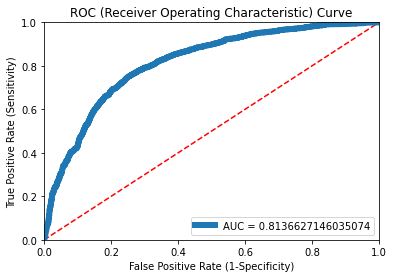

In [377]:
# ROC Curve
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC (Receiver Operating Characteristic) Curve')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot(fpr, tpr, label = 'AUC = ' + str(roc_auc), lw=6)
plt.legend(loc=4)
plt.show()

In [378]:
# With important features
x1 = data1[['lead_time', 'avg_price_per_room', 'no_of_special_requests', 'arrival_date','arrival_month','market_segment_type']]

In [379]:
x1

,lead_time,avg_price_per_room,no_of_special_requests,arrival_date,arrival_month,market_segment_type
0,0.003454,0.247166,0,0.900000,0.090909,4
1,0.728843,0.499055,0,0.633333,0.363636,4
2,0.165803,0.464421,0,0.333333,0.272727,4
3,1.000000,0.593514,1,0.400000,0.727273,4
4,0.103627,0.423489,0,0.833333,0.909091,4
...,...,...,...,...,...,...
23765,0.000000,0.681675,1,0.666667,0.454545,4
23766,0.041451,0.291247,1,0.500000,0.090909,2
23767,0.518135,0.443136,0,0.566667,0.727273,4
23768,0.348877,0.464421,2,0.466667,0.545455,4


In [380]:
y1 = data1['booking_status']
y1

0        0
1        0
2        0
3        0
4        0
        ..
23765    1
23766    1
23767    1
23768    1
23769    1
Name: booking_status, Length: 23770, dtype: int8

In [381]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB_Model1 = NB.fit(x_train1, y_train1)

In [382]:
NB_Pred1 = NB_Model1.predict(x_test1)
NB_Pred1

array([1, 1, 1, ..., 1, 0, 1], dtype=int8)

In [383]:
pd.crosstab(y_test1, NB_Pred1, rownames = ["Actual"], colnames = ["Predicted"], margins = True)

Predicted,0,1,All
Actual,,,
0,2231,738,2969
1,689,2285,2974
All,2920,3023,5943


In [384]:
confusion_matrix(y_test1, NB_Pred1)

array([[2231,  738],
       [ 689, 2285]], dtype=int64)

In [385]:
# classification_report
print(classification_report(y_test1, NB_Pred1))

              precision    recall  f1-score   support

           0       0.76      0.75      0.76      2969
           1       0.76      0.77      0.76      2974

    accuracy                           0.76      5943
   macro avg       0.76      0.76      0.76      5943
weighted avg       0.76      0.76      0.76      5943



In [386]:
# accuracy_score
NB_accuracy_imp = accuracy_score(y_test1, NB_Pred1)
NB_accuracy_imp

0.7598855796735655

In [387]:
# f1_score
from sklearn.metrics import f1_score

In [388]:
# define array of actual classes
actual1 = np.repeat([1, 0], repeats = [2969, 2974])

In [389]:
# define array of predicted classes
pred1 = np.repeat([1, 0, 1, 0], repeats=[2231, 738, 689, 2285])

In [390]:
# calculate F1 score
f1_score(actual1, pred1)

0.7576838172864663

In [391]:
# AUC
y_predict1 = NB_Model1.predict_proba(x1)
y_predict1[:,1]
plt.show()

In [392]:
# ROC Curve - Receiver Operating Characteristic curve
# threshold
# tpr = True Positive Rate 
# fpr = False Positive Rate
from sklearn.metrics import roc_curve, auc, roc_auc_score
fpr, tpr, thresholds = roc_curve(y1, y_predict1[:,1])
roc_auc = auc(fpr, tpr)
print("AUC Score : ", round(roc_auc, 3))

AUC Score :  0.825


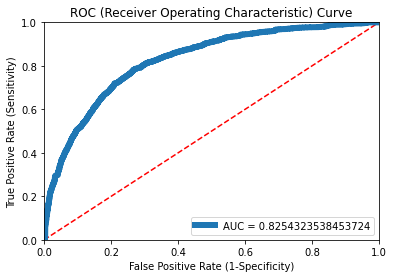

In [393]:
# ROC Curve
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC (Receiver Operating Characteristic) Curve')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot(fpr, tpr, label = 'AUC = ' + str(roc_auc), lw=6)
plt.legend(loc=4)
plt.show()

KNN

In [394]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN_Model = KNN.fit(x_train, y_train)

In [395]:
KNN_Pred = KNN_Model.predict(x_test)
KNN_Pred

array([1, 1, 1, ..., 0, 0, 0], dtype=int8)

In [396]:
pd.crosstab(y_test, KNN_Pred, rownames = ["Actual"], colnames = ["Predicted"], margins = True)

Predicted,0,1,All
Actual,,,
0,2394,575,2969
1,541,2433,2974
All,2935,3008,5943


In [397]:
confusion_matrix(y_test, KNN_Pred)

array([[2394,  575],
       [ 541, 2433]], dtype=int64)

In [398]:
# classification_report
print(classification_report(y_test,KNN_Pred))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81      2969
           1       0.81      0.82      0.81      2974

    accuracy                           0.81      5943
   macro avg       0.81      0.81      0.81      5943
weighted avg       0.81      0.81      0.81      5943



In [399]:
# accuracy_score
KNN_accuracy = accuracy_score(y_test, KNN_Pred)
KNN_accuracy

0.812216052498738

In [400]:
# f1_score
from sklearn.metrics import f1_score

In [401]:
# define array of actual classes
actual = np.repeat([1, 0], repeats = [2969, 2974])

In [402]:
# define array of predicted classes
pred = np.repeat([1, 0, 1, 0], repeats = [2394,  575, 541, 2433])

In [403]:
# calculate F1 score
f1_score(actual, pred)

0.8109756097560976

In [404]:
# AUC
y_predict = KNN_Model.predict_proba(x)
y_predict[:,1]
plt.show()

In [405]:
# ROC Curve - Receiver Operating Characteristic curve
# threshold
# tpr = True Positive Rate 
# fpr = False Positive Rate
from sklearn.metrics import roc_curve, auc, roc_auc_score
fpr, tpr, thresholds = roc_curve(y, y_predict[:,1])
roc_auc = auc(fpr, tpr)
print("AUC Score : ", round(roc_auc, 3))

AUC Score :  0.937


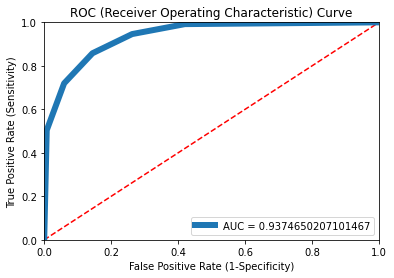

In [406]:
# ROC Curve
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC (Receiver Operating Characteristic) Curve')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot(fpr, tpr, label = 'AUC = ' + str(roc_auc), lw=6)
plt.legend(loc=4)
plt.show()

In [407]:
# With important features
KNN_Model1 = KNN.fit(x_train1, y_train1)


In [408]:
KNN_Pred1 = KNN_Model1.predict(x_test1)
KNN_Pred1

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [409]:
pd.crosstab(y_test1, KNN_Pred1, rownames = ["Actual"], colnames = ["Predicted"], margins = True)

Predicted,0,1,All
Actual,,,
0,2483,486,2969
1,462,2512,2974
All,2945,2998,5943


In [410]:
confusion_matrix(y_test1, KNN_Pred1)

array([[2483,  486],
       [ 462, 2512]], dtype=int64)

In [411]:
# classification_report
print(classification_report(y_test1, KNN_Pred1))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      2969
           1       0.84      0.84      0.84      2974

    accuracy                           0.84      5943
   macro avg       0.84      0.84      0.84      5943
weighted avg       0.84      0.84      0.84      5943



In [412]:
# accuracy_score
KNN_accuracy_imp = accuracy_score(y_test1, KNN_Pred1)
KNN_accuracy_imp

0.8404846037354872

In [413]:
# f1_score
from sklearn.metrics import f1_score

In [414]:
# define array of actual classes
actual1 = np.repeat([1, 0], repeats=[2969, 2974])

In [415]:
# define array of predicted classes
pred1 = np.repeat([1, 0, 1, 0], repeats=[2483,  486, 462, 2512])


In [416]:
# calculate F1 score
f1_score(actual1, pred1)

0.8397024010821779

In [417]:
# AUC
y_predict1 = KNN_Model1.predict_proba(x1)
y_predict1[:,1]
plt.show()

In [418]:
# ROC Curve - Receiver Operating Characteristic curve
# threshold
# tpr = True Positive Rate 
# fpr = False Positive Rate
from sklearn.metrics import roc_curve, auc, roc_auc_score
fpr, tpr, thresholds = roc_curve(y1, y_predict1[:,1])
roc_auc = auc(fpr, tpr)
print("AUC Score : ", round(roc_auc, 3))


AUC Score :  0.952


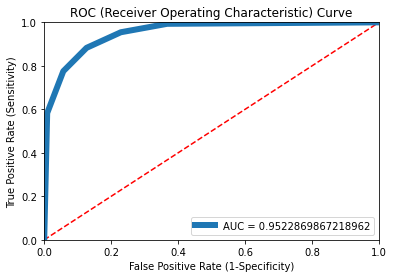

In [419]:
# ROC Curve
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC (Receiver Operating Characteristic) Curve')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot(fpr, tpr, label = 'AUC = ' + str(roc_auc), lw=6)
plt.legend(loc=4)
plt.show()

SVM

In [420]:
from sklearn.svm import SVC
SVC = SVC(kernel = "poly", C = 1, gamma = 'auto', probability = True)

In [421]:
SVC_Model = SVC.fit(x_train, y_train)


In [422]:
SVC_Pred = SVC_Model.predict(x_test)
SVC_Pred

array([1, 1, 1, ..., 1, 0, 0], dtype=int8)

In [423]:
pd.crosstab(y_test, SVC_Pred, rownames = ["Actual"], colnames = ["Predicted"], margins = True)

Predicted,0,1,All
Actual,,,
0,2358,611,2969
1,595,2379,2974
All,2953,2990,5943


In [424]:
confusion_matrix(y_test, SVC_Pred)

array([[2358,  611],
       [ 595, 2379]], dtype=int64)

In [425]:
# classification_report
print(classification_report(y_test, SVC_Pred))

              precision    recall  f1-score   support

           0       0.80      0.79      0.80      2969
           1       0.80      0.80      0.80      2974

    accuracy                           0.80      5943
   macro avg       0.80      0.80      0.80      5943
weighted avg       0.80      0.80      0.80      5943



In [426]:
# accuracy_score
SVM_accuracy = accuracy_score(y_test, SVC_Pred)
SVM_accuracy

0.7970721857647652

In [427]:
# f1_score
from sklearn.metrics import f1_score

In [428]:
# define array of actual classes
actual = np.repeat([1, 0], repeats = [2969, 2974])

In [429]:
# define array of predicted classes
pred = np.repeat([1, 0, 1, 0], repeats = [2358,  611, 595, 2379])

In [430]:
# calculate F1 score
f1_score(actual, pred)

0.7963525835866262

In [431]:
# AUC
y_predict = SVC_Model.predict_proba(x)
y_predict[:,1]
plt.show()

In [432]:
# ROC Curve - Receiver Operating Characteristic curve
# threshold
# tpr = True Positive Rate 
# fpr = False Positive Rate
from sklearn.metrics import roc_curve, auc, roc_auc_score
fpr, tpr, thresholds = roc_curve(y, y_predict[:,1])
roc_auc = auc(fpr, tpr)
print("AUC Score : ", round(roc_auc, 3))


AUC Score :  0.88


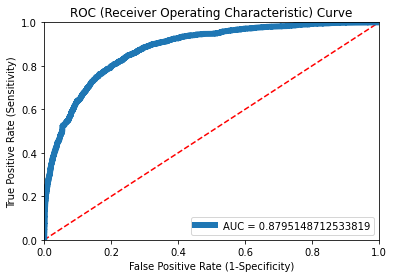

In [433]:
# ROC Curve
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC (Receiver Operating Characteristic) Curve')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot(fpr, tpr, label = 'AUC = ' + str(roc_auc), lw=6)
plt.legend(loc=4)
plt.show()

In [434]:
# With important features
SVC_Model1 = SVC.fit(x_train1, y_train1)


In [435]:
SVC_Pred1 = SVC_Model1.predict(x_test1)
SVC_Pred1

array([1, 1, 1, ..., 1, 0, 0], dtype=int8)

In [436]:
# confusion_matrix
pd.crosstab(y_test1, SVC_Pred1, rownames = ["Actual"], colnames = ["Predicted"], margins = True)

Predicted,0,1,All
Actual,,,
0,2258,711,2969
1,610,2364,2974
All,2868,3075,5943


In [437]:
confusion_matrix(y_test1, SVC_Pred1)

array([[2258,  711],
       [ 610, 2364]], dtype=int64)

In [438]:
# accuracy_score
SVM_accuracy_imp = accuracy_score(y_test1, SVC_Pred1)
SVM_accuracy_imp

0.7777216893824668

In [439]:
# f1_score
from sklearn.metrics import f1_score

In [440]:
# define array of actual classes
actual1 = np.repeat([1, 0], repeats = [2969, 2974])


In [441]:
# define array of predicted classes
pred1 = np.repeat([1, 0, 1, 0], repeats = [2258, 711, 610, 2364])


In [442]:
# calculate F1 score
f1_score(actual1, pred1)

0.773685112215179

In [443]:
# AUC
y_predict1 = SVC_Model1.predict_proba(x1)
y_predict1[:,1]
plt.show()

In [444]:
# ROC Curve - Receiver Operating Characteristic curve
# threshold
# tpr = True Positive Rate 
# fpr = False Positive Rate
from sklearn.metrics import roc_curve, auc, roc_auc_score
fpr, tpr, thresholds = roc_curve(y1, y_predict1[:,1])
roc_auc = auc(fpr, tpr)
print("AUC Score : ", round(roc_auc, 3))


AUC Score :  0.86


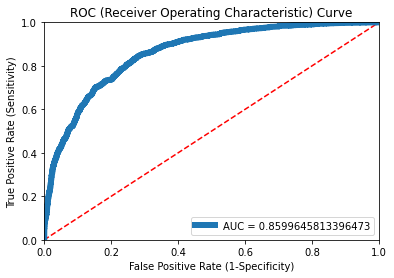

In [445]:
# ROC Curve
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC (Receiver Operating Characteristic) Curve')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot(fpr, tpr, label = 'AUC = ' + str(roc_auc), lw=6)
plt.legend(loc=4)
plt.show()

Tabulation

In [446]:
Accuracy_Comp_df = pd.DataFrame({'Classification Model' : ['LOG-RRG-FULL', 'LOG-REG-IMP', 'ADABOOST', 'ADABOOST-IMP', 
                                            'NAIVE-BAYES', 'NAIVE-BAYES-IMP', 'KNN', 'KNN-IMP', 'SVM', 'SVM-IMP'],
                        'Accuracy' : [Logi_accuracy, Logi_accuracy_imp, Ada_accuracy, Ada_accuracy_imp, NB_accuracy, 
                                               NB_accuracy_imp, KNN_accuracy, KNN_accuracy_imp, SVM_accuracy, SVM_accuracy_imp]})

In [447]:
Accuracy_Comp_df

,Classification Model,Accuracy
0,LOG-RRG-FULL,0.784392
1,LOG-REG-IMP,0.774085
2,ADABOOST,0.797745
3,ADABOOST-IMP,0.796567
4,NAIVE-BAYES,0.572270
5,NAIVE-BAYES-IMP,0.759886
6,KNN,0.812216
7,KNN-IMP,0.840485
8,SVM,0.797072
9,SVM-IMP,0.777722


In [448]:
list_acc = [Logi_accuracy, Logi_accuracy_imp, Ada_accuracy, Ada_accuracy_imp, NB_accuracy, 
            NB_accuracy_imp, KNN_accuracy, KNN_accuracy_imp, SVM_accuracy, SVM_accuracy_imp]

In [449]:
list1 = ['LOG-RRG-FULL', 'LOG-REG-IMP', 'ADABOOST', 'ADABOOST-IMP', 
         'NAIVE-BAYES', 'NAIVE-BAYES-IMP', 'KNN', 'KNN-IMP','SVM', 'SVM-IMP']

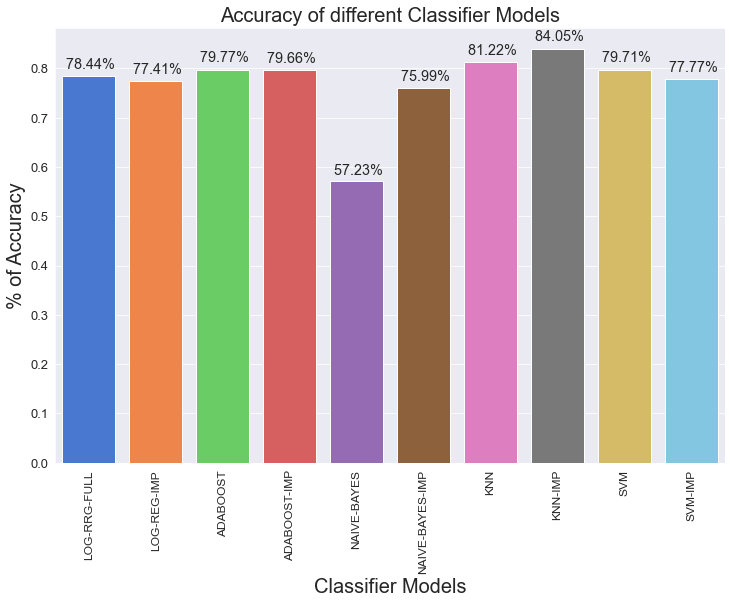

In [450]:
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_style('darkgrid')
ax = sns.barplot(x = list1, y = list_acc, palette = 'muted', saturation = 1.5)
plt.xlabel('Classifier Models', fontsize = 20)
plt.ylabel('% of Accuracy', fontsize = 20)
plt.title('Accuracy of different Classifier Models', fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 90)
plt.yticks(fontsize = 13)


for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height : .2%}', (x + width/2, y + height*1.02), ha = 'center', fontsize = 'x-large')

plt.show()

In [452]:
#From the above Table & Graph, We can see that KNN gave the best accuracy(84 %). So we can use the KNN for the Model Building